In [1]:
import tensorflow as tf  # importing tensorflow library
from tensorflow import keras # importing keras which is a high level API within tensorflow
import pandas as pd  #pandas and numpy are the data manipulation libraries, pandas is used for data preprocessing and numpy is used for array manipulation
import numpy as np
import matplotlib.pyplot as plt #matplotlib.pyplot is a data visualisation library
import random # it is used to get random values
%matplotlib inline # it is a command from matlotlib library that allows to sghow us the grapg directly below the code cells

Importing dataset and splitting it into training and testing

In [4]:
mist= tf.keras.datasets.mnist  #the mnist dataset is available within keras dataset. it is the classical dataset that consists of 60,000 training images and 10,000 handwritten digits of 28*28 grayscale
(x_train, y_train), (x_test, y_test) = mist.load_data() #spliiting the dataset into training and testing

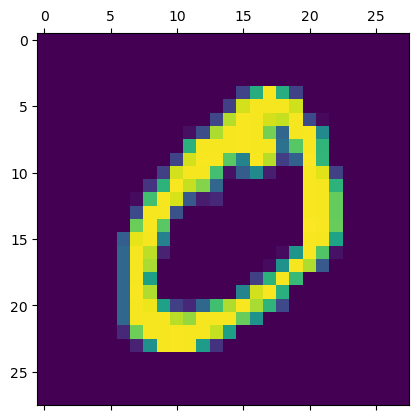

In [5]:
plt.matshow(x_train[1]) # this commands gives the second image from training dataset with a matrix plot and its output is a handwritten digit

In [8]:
x_train= x_train/ 255 #scaling down the pixel values from 0-255 to a smaller range of 0-1 for model efficiency
x_test = x_test/ 255

In [10]:
#It defines the architecture of feedforward neural network
model= keras.Sequential ([ #initalising the model and layers are added one by one
    keras.layers.Flatten(input_shape=(28, 28)), #it is the flatten layer that reshapes each 28*28 image into one-d array
    keras.layers.Dense(128, activation="relu"),  #it is the denser layer with 128 neurons and use the rectified linear unit to learn complex patterns
    keras.layers.Dense(10, activation="softmax") #it is also denser layer with 10 neurons for each 0-9 digits, it uses softmax activation function
])

model.summary() #it gives the summary of above layers

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# it gives information about the optimiser, loss and metrics
model.compile(optimizer="sgd", #stochastic gradient descent that updates model weight
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [12]:
#training the model
history= model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 10) #here the model will train for 10 complete passes

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7284 - loss: 1.0406 - val_accuracy: 0.9051 - val_loss: 0.3535
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9040 - loss: 0.3490 - val_accuracy: 0.9200 - val_loss: 0.2923
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9173 - loss: 0.2967 - val_accuracy: 0.9290 - val_loss: 0.2587
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9250 - loss: 0.2661 - val_accuracy: 0.9348 - val_loss: 0.2356
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9351 - loss: 0.2369 - val_accuracy: 0.9396 - val_loss: 0.2180
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9402 - loss: 0.2174 - val_accuracy: 0.9446 - val_loss: 0.2040
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1974 - val_accuracy: 0.9467 - val_loss: 0.1900
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9493 - loss: 0.1869 - 

Evaluates the trained model on test data

In [14]:
test_loss, test_acc= model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)  #it is formatted to three decimal number
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9461 - loss: 0.1851
Loss=0.161
Accuracy=0.954


Visualising the trained model on random number

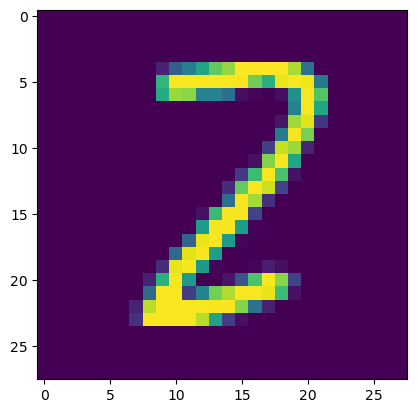

In [20]:
n= random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()

Predicts the above generated value

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


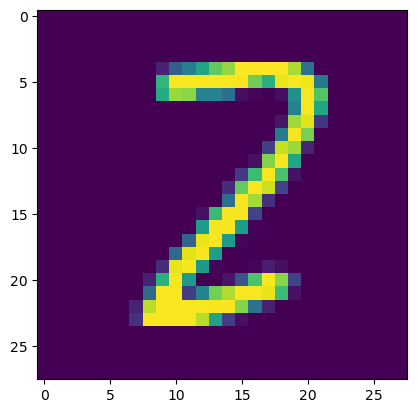

[1.5145844e-04 2.7024133e-02 9.1396248e-01 1.2537702e-02 9.3306980e-06
 4.1246362e-04 1.7760439e-04 6.2862964e-06 4.5717474e-02 1.1068008e-06]


In [21]:
predicted_value= model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print(predicted_value[n])

Tracking model performance

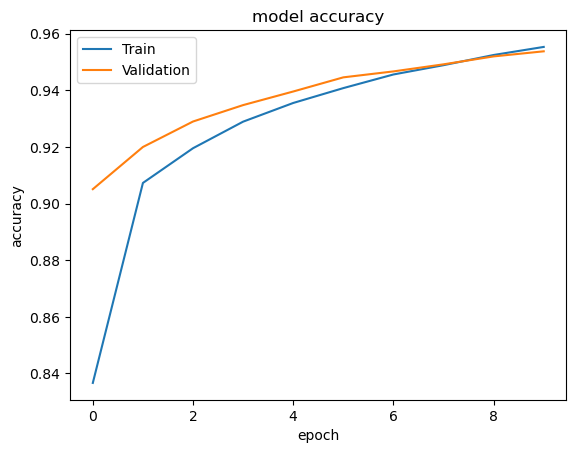

In [22]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

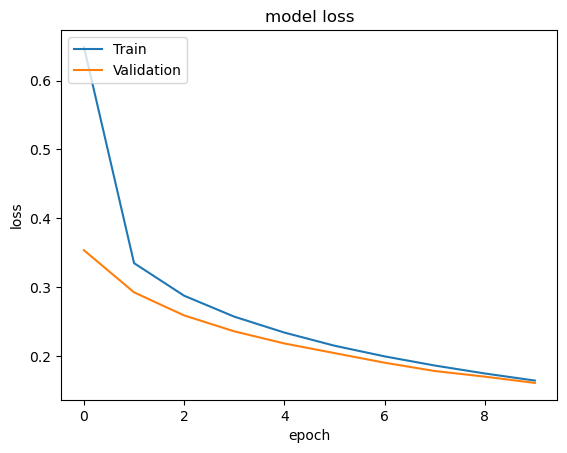

In [23]:
history.history.keys()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()